# Python Project Template

1. Prepare Problem
    - a) Load libraries
    - b) Load dataset
2. Summarize Data
    - a) Descriptive statistics
    - b) Data visualizations
3. Prepare Data
    - a) Data Cleaning
    - b) Feature Selection
    - c) Data Transforms
4. Evaluate Algorithms
    - a) Split-out validation dataset
    - b) Test options and evaluation metric
    - c) Spot Check Algorithms
    - d) Compare Algorithms
5. Improve Accuracy
    - a) Algorithm Tuning
    - b) Ensembles
6. Finalize Model
    - a) Predictions on validation dataset
    - b) Create standalone model on entire training dataset
    - c) Save model for later use

# 1 Prepare Problem

In [1]:
# load libraries
from pandas import read_csv
from pandas.tools.plotting import scatter_matrix

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [3]:
# load data 
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-lenght', 'petal-width', 'class']
df = read_csv(url, names=names)

# 2 Summarize Data

In [4]:
# shape 150个样本，4个特征，1个类别
print(df.shape)

(150, 5)


In [5]:
# head 来看一看我们的数据
df.head(20)

,sepal-length,sepal-width,petal-lenght,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [6]:
# descriptions 看看一些统计数据
df.describe()

,sepal-length,sepal-width,petal-lenght,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
# 类别数目
df.groupby('class').size()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

## Data visualizations

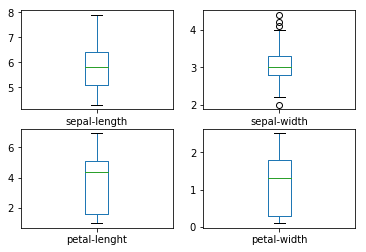

In [9]:
# box and whisker plots
df.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

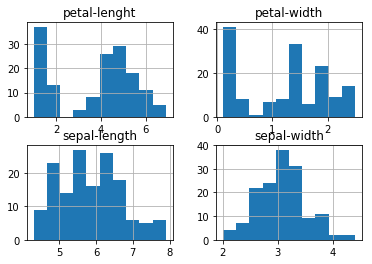

In [10]:
# histograms
df.hist()
plt.show()

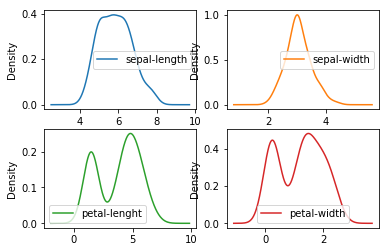

In [11]:
# density plot
df.plot(kind='density', subplots=True, layout=(2,2), sharex=False)
plt.show()

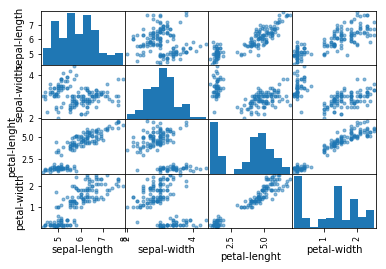

In [12]:
# scatter plot matrix
scatter_matrix(df)
plt.show()

# Evaluate some algorithms

In [13]:
# split-out validation dataset
X = df.iloc[:, 0:4]
Y = df.iloc[:, 4]

validation_size = 0.20
seed =42
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, 
        test_size=validation_size, random_state=seed)

In [17]:
# Spot-check algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))

models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=42)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "{0}: {1:.6f}({2:.6f})".format(name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.950000(0.040825)
LDA: 0.975000(0.038188)
KNN: 0.950000(0.055277)
CART: 0.941667(0.053359)
NB: 0.950000(0.055277)
SVM: 0.958333(0.041667)


可以看出 LDA 线性判别分析的分类准确率（平均）最好

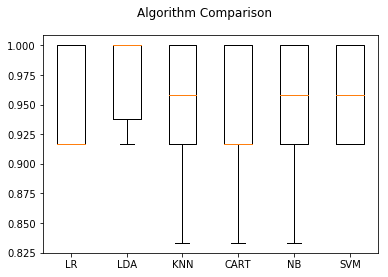

In [19]:
# compare algorithm
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [20]:
# Make Predictions on validation dataset
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, Y_train)
predictions = lda.predict(X_validation)

print("Accuracy:")
print(accuracy_score(Y_validation, predictions))

print("Confusion Matrix:")
print(confusion_matrix(Y_validation, predictions))

print("Classification Report:")
print(classification_report(Y_validation, predictions))

Accuracy:
1.0
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

    avg / total       1.00      1.00      1.00        30

